In [93]:
%matplotlib inline

In [156]:
import os
import tarfile
from six.moves import urllib

import numpy as np
import pandas as pd
from pandas.plotting  import scatter_matrix
from matplotlib import pyplot as plt
from matplotlib import image as mpimg
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [95]:
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [96]:
def load_housing_data(housing_path=HOUSING_PATH):
    fetch_housing_data()
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

In [97]:
housing = load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [98]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [99]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


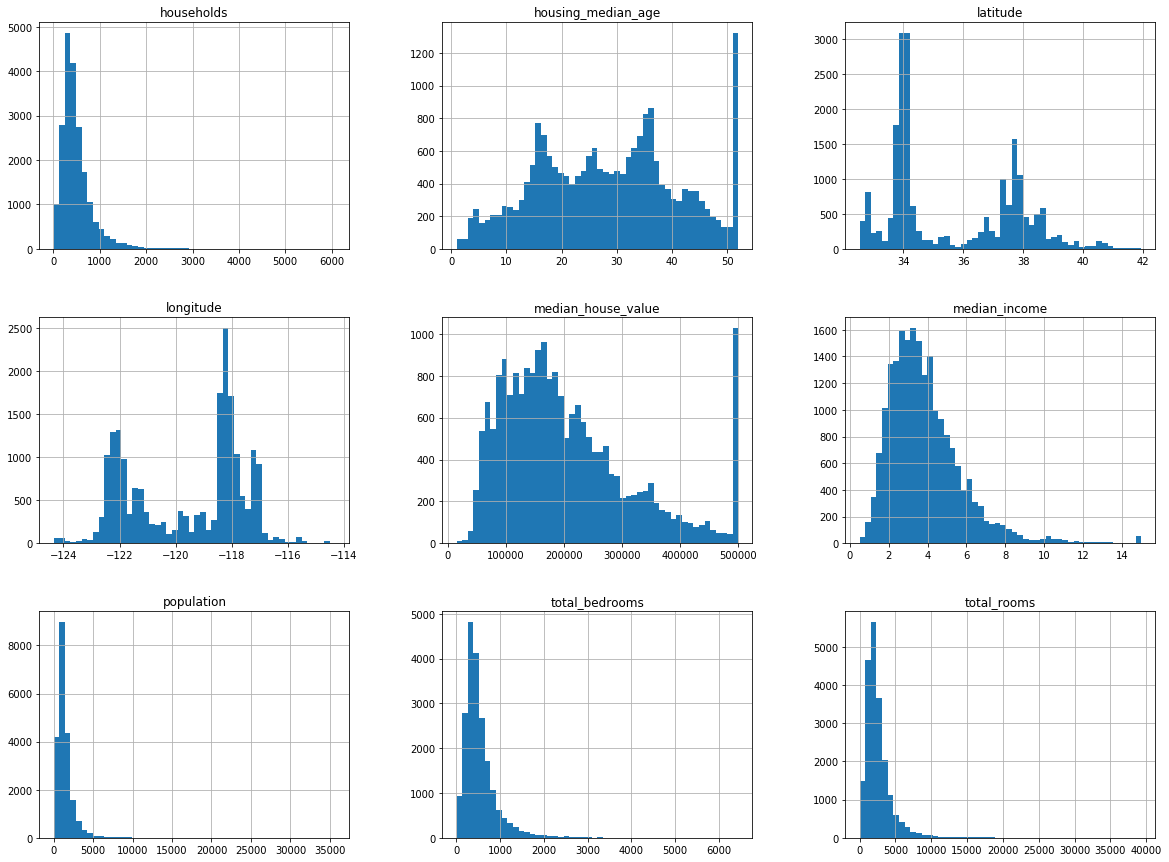

In [100]:
housing.hist(bins=50, figsize=(20,15))
plt.show()

In [101]:
train_data, test_data = train_test_split(housing, test_size=0.2, random_state=42)

In [102]:
train_data.shape

(16512, 10)

In [103]:
test_data.shape

(4128, 10)

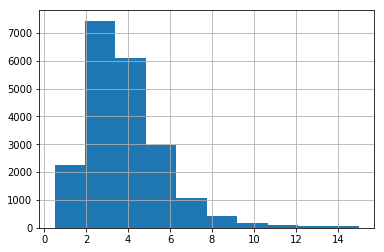

In [104]:
housing["median_income"].hist()

In [105]:
housing["income_cat"] = np.ceil(housing["median_income"] / 1.5)
housing["income_cat"].where(housing["income_cat"] < 5, 5.0, inplace=True)

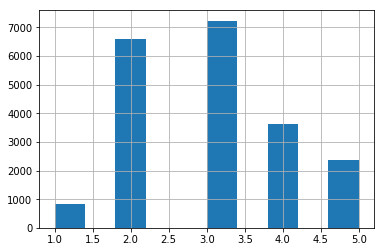

In [106]:
housing['income_cat'].hist()
plt.show()

In [107]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [108]:
strat_train_set.shape

(16512, 11)

In [109]:
strat_test_set.shape

(4128, 11)

In [110]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

In [111]:
strat_train_set.shape

(16512, 10)

In [112]:
strat_test_set.shape

(4128, 10)

In [113]:
housing = strat_train_set.copy()

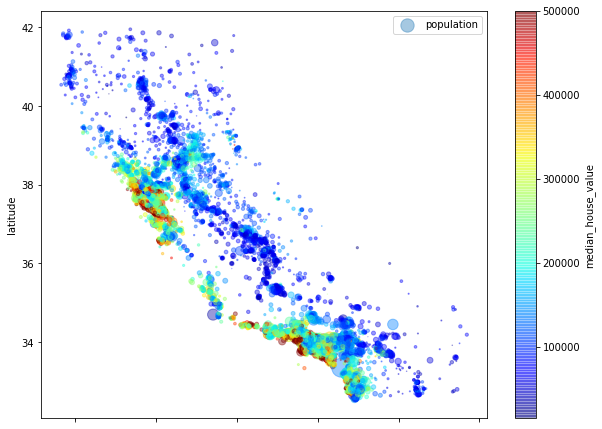

In [114]:
housing.plot(kind='scatter', x="longitude", y="latitude", alpha=0.4, s=housing['population']/100, 
             label='population', c='median_house_value', cmap=plt.get_cmap('jet'), colorbar=True, figsize=(10, 7.5))
plt.legend()

In [115]:
corr_matrix = housing.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

In [116]:
import seaborn as sns

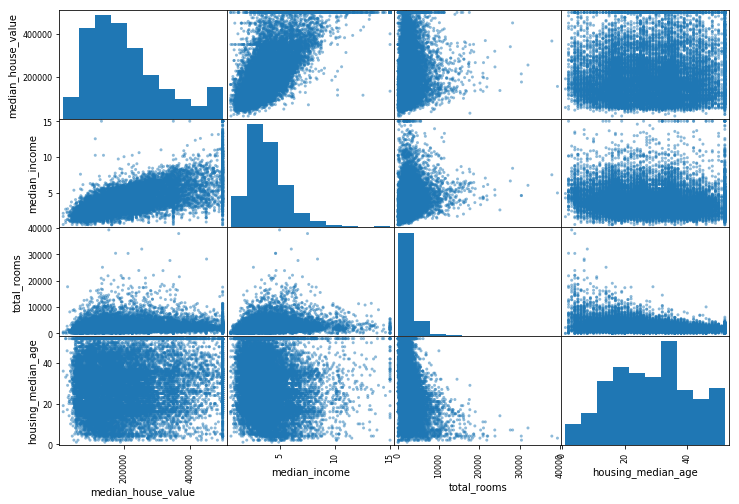

In [117]:
categories = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
scatter_matrix(housing[categories], figsize=(12, 8))
plt.show()

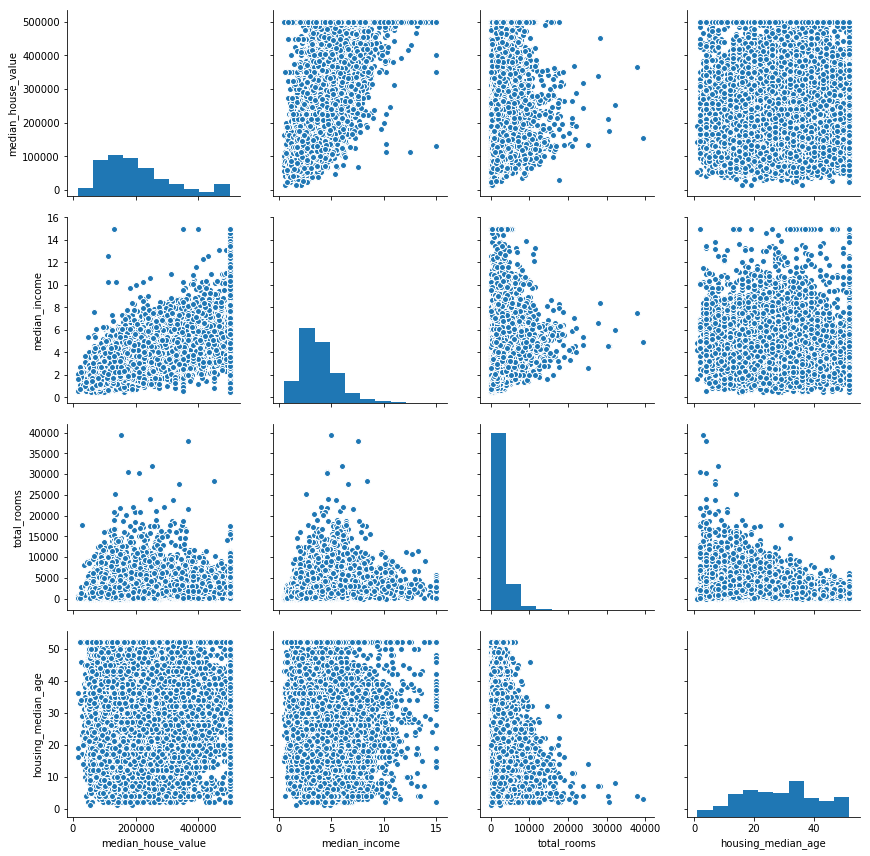

In [118]:
sns.pairplot(data=housing[categories], size=3)

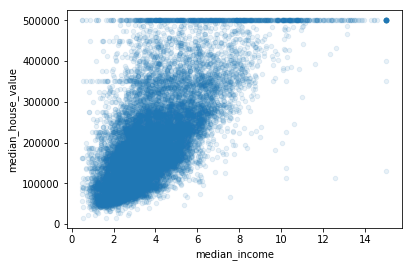

In [119]:
housing.plot(kind='scatter', x='median_income', y='median_house_value', alpha=0.1)
plt.show()

In [120]:
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"] = housing["population"]/housing["households"]

In [121]:
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687160
rooms_per_household         0.146285
total_rooms                 0.135097
housing_median_age          0.114110
households                  0.064506
total_bedrooms              0.047689
population_per_household   -0.021985
population                 -0.026920
longitude                  -0.047432
latitude                   -0.142724
bedrooms_per_room          -0.259984
Name: median_house_value, dtype: float64

In [122]:
X = strat_train_set.drop('median_house_value', axis=1)
y = strat_train_set['median_house_value'].copy()

In [123]:
def fill_missing(data, imputer):
    X = imputer.fit_transform(data)
    X = pd.DataFrame(X, columns=data.columns)
    return X

In [124]:
X_numerical = X.drop('ocean_proximity', axis=1)

In [125]:
imputer = SimpleImputer(strategy='median')
X = fill_missing(X_numerical, imputer)

In [126]:
def one_hot_encode(data):
    encoder = OneHotEncoder()
    return encoder.fit_transform(data.reshape(-1, 1))

In [127]:
ocean_prox = housing['ocean_proximity']
ocean_prox_encoded, _ = ocean_prox.factorize()

In [128]:
ocean_prox_onehot = one_hot_encode(ocean_prox_encoded)

C:\Users\Tuomas\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [129]:
rooms_ix, bedrooms_ix, population_ix, household_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True): # no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix] / X[:, household_ix]
        population_per_household = X[:, population_ix] / X[:, household_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

In [130]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('attribs_adder', CombinedAttributesAdder()),
        ('std_scaler', StandardScaler()),
    ])

X_numerical_tr = num_pipeline.fit_transform(X_numerical)

In [132]:
numerical_attributes = list(X_numerical)
categorical_attributes = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, numerical_attributes),
        ("cat", OneHotEncoder(), categorical_attributes),
    ])

X_prepared = full_pipeline.fit_transform(housing)
X_prepared.shape

(16512, 16)

In [147]:
model = LinearRegression()
model.fit(X_prepared, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [148]:
train_preds = model.predict(X_prepared)

In [149]:
train_loss = np.sqrt(mean_squared_error(y, train_preds))
train_loss

68628.19819848923

In [150]:
model = DecisionTreeRegressor()
model.fit(X_prepared, y)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [151]:
train_preds = model.predict(X_prepared)

In [153]:
train_loss = np.sqrt(mean_squared_error(y, train_preds))
train_loss

0.0

In [155]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X_prepared, y, scoring='neg_mean_squared_error', cv=10)
loss = np.sqrt(-scores)
loss

array([67638.31608146, 67492.60519656, 69273.23747537, 68906.21072322,
       71614.21778119, 75221.73311975, 70383.74491797, 71379.12566218,
       76284.14098144, 69682.75975495])

In [158]:
model = RandomForestRegressor(n_estimators=10)
model.fit(X_prepared, y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [160]:
train_preds = model.predict(X_prepared)

In [161]:
train_loss = np.sqrt(mean_squared_error(y, train_preds))
train_loss

21951.4418787286

In [162]:
scores = cross_val_score(model, X_prepared, y, scoring='neg_mean_squared_error', cv=10)
loss = np.sqrt(-scores)
loss

array([52405.15298985, 50002.0284851 , 52097.06315211, 54360.69794633,
       52611.9948683 , 55804.20285549, 50540.15956946, 50958.33536424,
       55324.96491692, 51549.8819656 ])